# WITH SEABORN

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.shape

(2535, 14)

In [7]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [8]:
kill.dropna(inplace=True)

In [9]:
kill.shape

# satır sayısının 2254'e düştüğünü gördüm.

(2254, 14)

In [48]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

## 1a: Box plot of age in both genders separeted by manner of death.

In [50]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [51]:
kill.manner_of_death.unique()

# kill['manner_of_death'].unique() de olabilir.

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

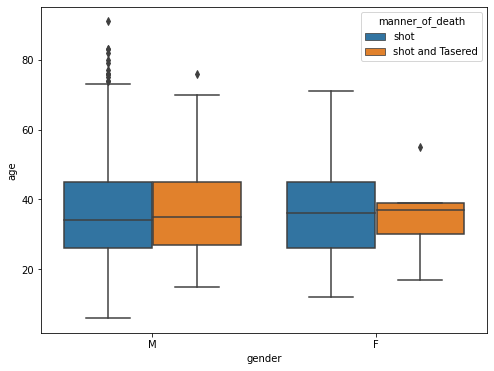

In [52]:
# with seaborn

plt.figure(figsize = (8,6))
sns.boxplot(x = 'gender', y = 'age', hue = 'manner_of_death', data=kill);


Text(0, 0.5, 'Age')

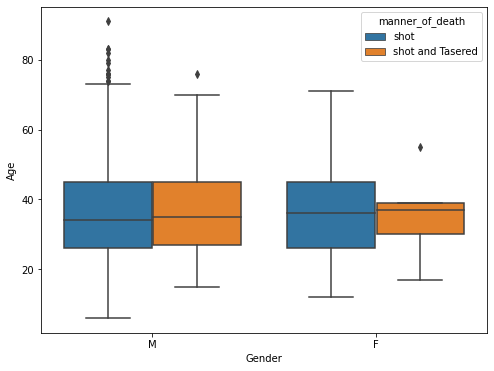

In [11]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'gender', y = 'age', hue = 'manner_of_death', data=kill);


# title'ların daha düzgün olmasını istiyorsan label ismi girebilirsin.
plt.xlabel('Gender')
plt.ylabel('Age')

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

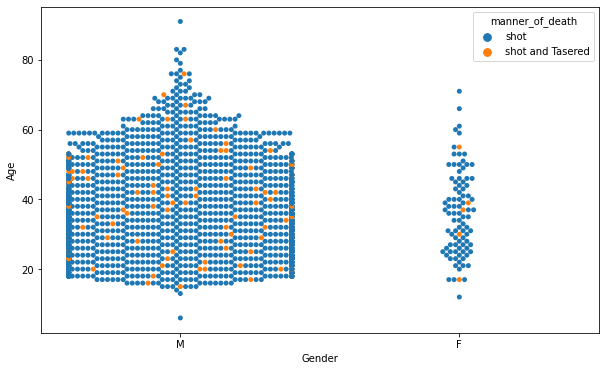

In [12]:
# with seaborn

plt.figure(figsize = (10,6))

sns.swarmplot(x = 'gender', y = 'age', data=kill, hue = 'manner_of_death')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## 2: Plot 12 most dangerous cities

In [54]:
kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
527,644,Samuel Smith,17/07/15,shot,knife,27.0,M,W,Seattle,WA,False,other,Foot,False
1148,1312,Luke Miller,25/02/16,shot,gun,37.0,M,W,Evans,CO,False,attack,Foot,True
1986,2227,Rodney L. Hoback,12/01/17,shot,knife,26.0,M,W,Pearisburg,VA,True,attack,Not fleeing,False
1878,2095,Quinton Phillips,01/12/16,shot,gun,83.0,M,W,Dover,AR,False,attack,Not fleeing,False
2202,2452,Reno Joseph Owens,24/03/17,shot,knife,39.0,M,B,Baltimore,MD,True,other,Not fleeing,True
675,807,Angelo Delano Perry,05/09/15,shot,gun,35.0,M,B,Virginia Beach,VA,False,attack,Not fleeing,False
1455,1645,Roger Ponce,22/06/16,shot,knife,37.0,M,W,Wellington,FL,False,other,Not fleeing,False
1459,1648,Jay Anderson,23/06/16,shot,gun,25.0,M,B,Wauwatosa,WI,False,other,Not fleeing,True
1342,1526,Michael Johnson,09/05/16,shot,gun,26.0,M,W,Chicago,IL,False,other,Foot,False
941,1085,Calvin McKinnis,14/12/15,shot,gun,33.0,M,B,New Orleans,LA,False,attack,Not fleeing,True


In [55]:
kill.city.isnull().sum()

0

In [17]:
city_12 = kill.city.value_counts().head(12)

# city_12 = kill['city'].value_counts()[:13]

city_12

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Tucson          13
Name: city, dtype: int64

In [18]:
city_index_12 = city_12.index
 
# city_index_12 = kill.city.value_counts().head(12).index

city_index_12

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Tucson'],
      dtype='object')

In [19]:
city_values_12 = city_12.values

# city_values_12 = kill.city.value_counts().head(12).values

city_values_12

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

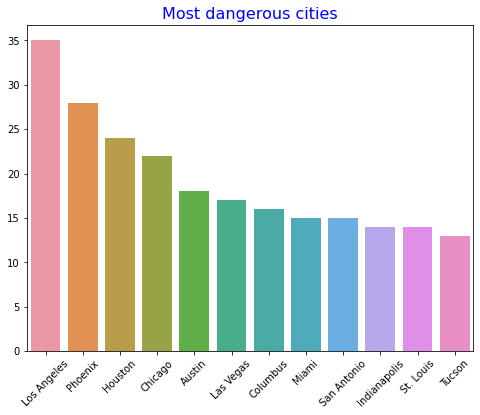

In [20]:
# with seaborn barplot

plt.figure(figsize = (8,6))
sns.barplot(x = city_index_12, y = city_values_12, data = kill)
plt.title('Most dangerous cities', color = 'blue', fontsize=16)
plt.xticks(rotation=45)
plt.show()

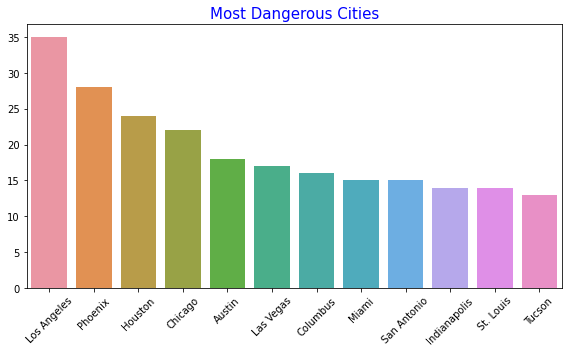

In [21]:
# 2. yöntem

fig, ax =plt.subplots(figsize=(8,5))

ax = sns.barplot(x=city_index_12, y=city_values_12)
ax.set_xticklabels(city_index_12, rotation = 45)
ax.set_title('Most Dangerous Cities',color = 'blue',fontsize=15)
plt.tight_layout();

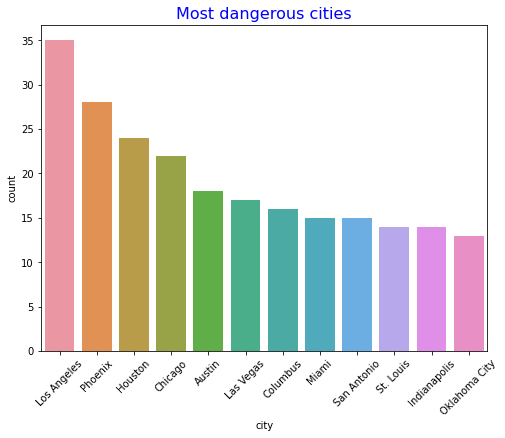

In [60]:
# with seaborn countplot

plt.figure(figsize = (8,6))
sns.countplot(data = kill , x = 'city', order = city_index_12);
plt.title("Most dangerous cities", color = "blue", fontsize=16)
plt.xticks(rotation = 45);
plt.show()

#for index , value in enumerate(city_12):
#    plt.text(index, value, str(value), ha = 'center', va = "bottom")

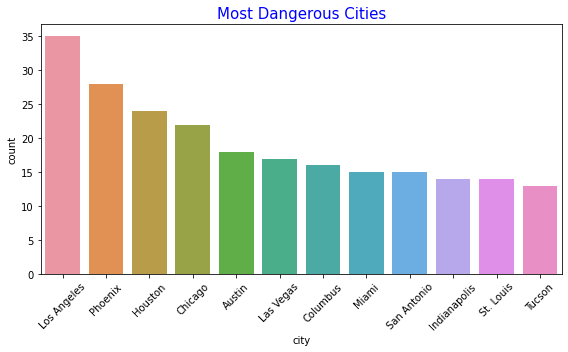

In [25]:
# 2. yöntem

fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=kill,
             order=city_index_12)

ax.set_xticklabels(city_index_12, rotation = 45)
ax.set_title('Most Dangerous Cities',color = 'blue',fontsize=15)
plt.tight_layout();

## 3: Plot 20 most dangerous states

In [61]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [27]:
state_20 = kill.state.value_counts().head(20)

# state_20 = df['state'].value_counts().head(20)[:20]

state_20

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

In [28]:
state_index_20 = state_20.index
state_index_20

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'NC', 'OK', 'CO', 'GA', 'MO', 'IL', 'TN',
       'WA', 'LA', 'AL', 'PA', 'VA', 'NY', 'WI', 'NM'],
      dtype='object')

In [29]:
state_values_20 = state_20.values
state_values_20

array([366, 200, 136, 105,  70,  66,  65,  63,  61,  58,  56,  56,  51,
        47,  45,  45,  43,  43,  42,  41], dtype=int64)

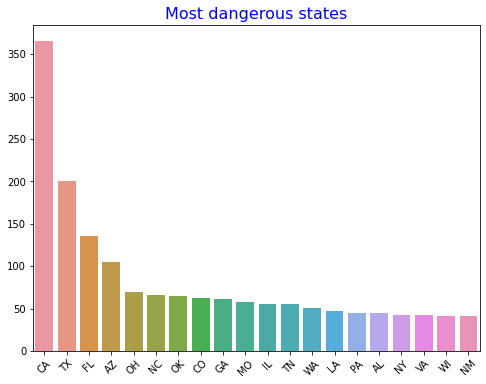

In [66]:
# with seaborn barplot

plt.figure(figsize = (8,6))
sns.barplot(x = state_index_20, y = state_values_20, data = kill)
plt.title('Most dangerous states', color = 'blue', fontsize=16)
plt.xticks(rotation=45)
plt.show()

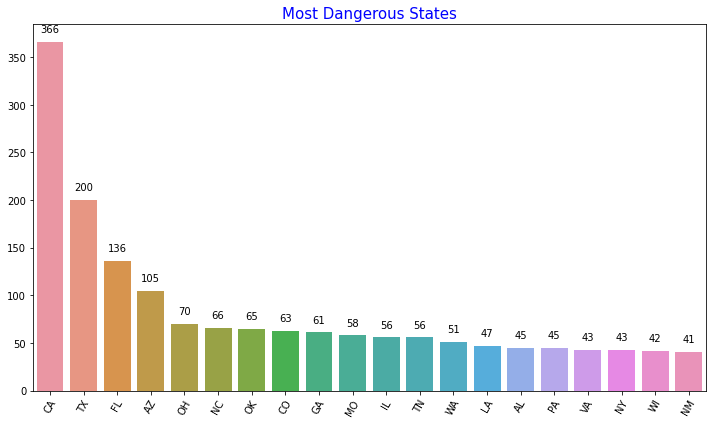

In [31]:
# 2. yöntem

plt.figure(figsize=(10,6))
sns.barplot(x = state_20.index, y = state_20.values)
plt.xticks(rotation=60)
plt.title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()

for index,value in enumerate(kill['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center')

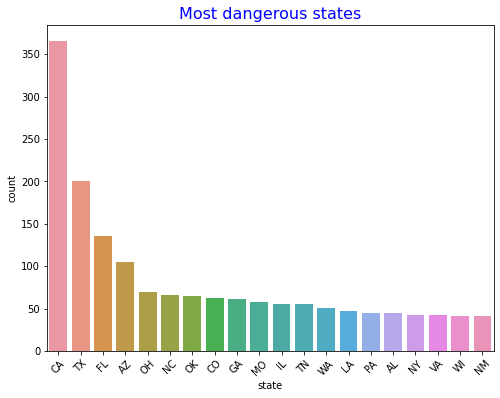

In [67]:
# with seaborn countplot

plt.figure(figsize = (8,6))
sns.countplot(x = 'state', order = state_20.index, data = kill)
plt.title('Most dangerous states', color = 'blue', fontsize=16)
plt.xticks(rotation=45)
plt.show()


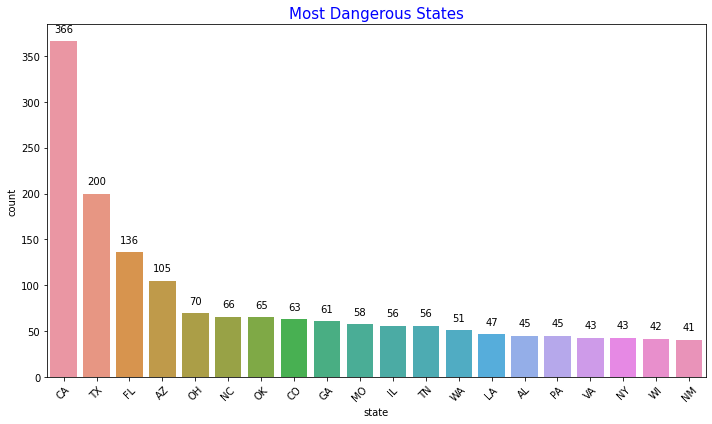

In [33]:
fig, ax =plt.subplots(figsize=(10,6))
sns.countplot(x="state", data=kill,
             order=state_20.index,
             )
ax.set_xticklabels(state_20.index, rotation = 45)
ax.set_title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()
for index,value in enumerate(kill['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

## 4: Plot Having mental ilness or not for killed people

In [68]:
kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
70,347,Cody Karasek,28/01/15,shot,gun,26.0,M,W,Rosenberg,TX,False,attack,Not fleeing,False
10,19,Patrick Wetter,06/01/15,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False
2043,2276,Refugio Alvarez,30/01/17,shot and Tasered,gun and knife,45.0,M,H,Fresno,CA,True,attack,Not fleeing,False
853,999,Brian Gavin,11/11/15,shot,gun,57.0,M,W,Aiken,SC,False,attack,Not fleeing,False
937,1077,Shirley Weis,13/12/15,shot,gun,51.0,F,W,Arlington,TX,True,attack,Not fleeing,False
1326,1510,Raymond Hopper,03/05/16,shot,knife,59.0,M,W,Visalia,CA,False,other,Not fleeing,False
425,541,Charles Ziegler,11/06/15,shot,gun,40.0,M,B,Pompano Beach,FL,False,attack,Not fleeing,False
1183,1355,"Manford ""Butch"" Moore Jr.",11/03/16,shot,gun,51.0,M,W,Rosalia,KS,True,attack,Not fleeing,True
1723,1922,Daniel Perez,02/10/16,shot,toy weapon,16.0,M,H,Los Angeles,CA,True,attack,Not fleeing,True
1751,1961,Matthew Brewer,12/10/16,shot,gun,22.0,M,W,Morehead,KY,False,attack,Not fleeing,False


In [69]:
kill.signs_of_mental_illness.value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

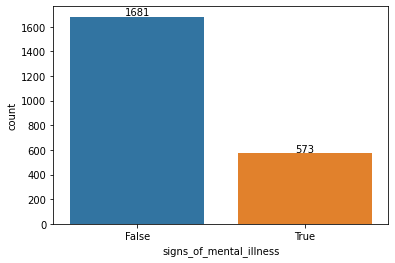

In [34]:
# with seaborn

sns.countplot(x = "signs_of_mental_illness", order = kill.signs_of_mental_illness.value_counts().index, 
              data =kill)

#for index, value in enumerate(kill.signs_of_mental_illness.value_counts()):
#    plt.text(index,value + 1,str(value), ha = "center" ) 

for index,value in enumerate(kill["signs_of_mental_illness"].value_counts()):
    plt.text(x=index , y =value+10 ,s=f"{value}", horizontalalignment='center');

plt.show()

## 5: Plot number of Threat Types

In [74]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [75]:
kill.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

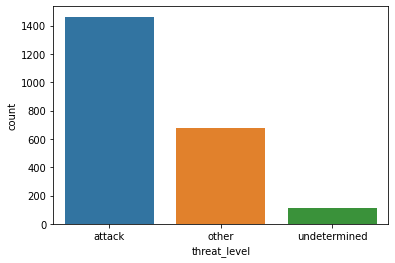

In [76]:
# with seaborn

sns.countplot(x = "threat_level", order = kill.threat_level.value_counts().index, 
              data = kill);

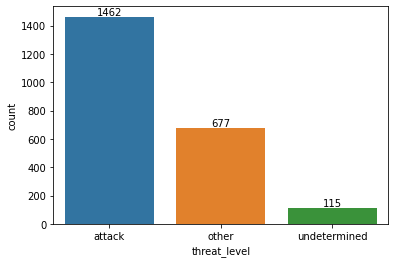

In [35]:
# 2. yöntem

sns.countplot(x=kill['threat_level'])

for index,value in enumerate(kill['threat_level'].value_counts()):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

## 6: Plot number of Flee Types

In [77]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

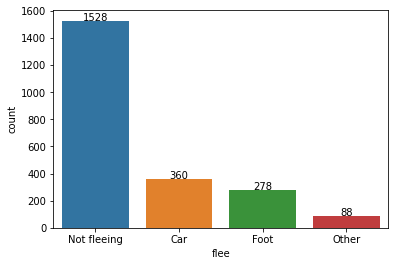

In [37]:
# with seaborn

sns.countplot(x = "flee", order = kill.flee.value_counts().index, 
              data = kill)

for index, value in enumerate(kill.flee.value_counts()):
    plt.text(index,value + 1,str(value), ha = "center" ) 
plt.show()